## nvm this kinda works maybe

In [1]:
import pandas as pd
from statsmodels.tsa import arima_model
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'../../data/cases/CA_JHU_cases.csv')
df['date'] = pd.to_datetime(df['date'])
df.head()

,date,California.JHU_ConfirmedCases.data,California.JHU_ConfirmedCases.missing,California.JHU_ConfirmedDeaths.data,California.JHU_ConfirmedDeaths.missing,California.JHU_ConfirmedRecoveries.data,California.JHU_ConfirmedRecoveries.missing
0,2020-01-01,0.0,5700.0,0.0,5700.0,0.0,11500.0
1,2020-01-02,0.0,5700.0,0.0,5700.0,0.0,11500.0
2,2020-01-03,0.0,5700.0,0.0,5700.0,0.0,11500.0
3,2020-01-04,0.0,5700.0,0.0,5700.0,0.0,11500.0
4,2020-01-05,0.0,5700.0,0.0,5700.0,0.0,11500.0


In [3]:
cases = df[['date', 'California.JHU_ConfirmedCases.data']]
cases.head()

,date,California.JHU_ConfirmedCases.data
0,2020-01-01,0.0
1,2020-01-02,0.0
2,2020-01-03,0.0
3,2020-01-04,0.0
4,2020-01-05,0.0


## Try an ARIMA Model

In [4]:
arima = arima_model.ARIMA(cases['California.JHU_ConfirmedCases.data'], order=(5,2,2))
arima_fit = arima.fit(disp=0)
arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       ARIMA Model Results                                       
=================================================================================================
Dep. Variable:     D2.California.JHU_ConfirmedCases.data   No. Observations:                  313
Model:                                    ARIMA(5, 2, 2)   Log Likelihood               -2951.056
Method:                                          css-mle   S.D. of innovations           2997.769
Date:                                   Fri, 13 Nov 2020   AIC                           5920.113
Time:                                           14:13:33   BIC                           5953.829
Sample:                                                2   HQIC                          5933.586
                                                                                                 
===============================================================================================================
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                          32.6193     39.626      0.823      0.410     -45.045     110.284
ar.L1.D2.California.JHU_ConfirmedCases.data    -0.0360      0.160     -0.225      0.822      -0.350       0.277
ar.L2.D2.California.JHU_ConfirmedCases.data    -0.2403      0.065     -3.685      0.000      -0.368      -0.113
ar.L3.D2.California.JHU_ConfirmedCases.data    -0.4694      0.062     -7.620      0.000      -0.590      -0.349
ar.L4.D2.California.JHU_ConfirmedCases.data    -0.2303      0.062     -3.698      0.000      -0.352      -0.108
ar.L5.D2.California.JHU_ConfirmedCases.data    -0.4043      0.064     -6.274      0.000      -0.531      -0.278
ma.L1.D2.California.JHU_ConfirmedCases.data    -0.9090      0.170     -5.357      0.000      -1.242      -0.576
ma.L2.D2.California.JHU_ConfirmedCases.data     0.4620      0.168      2.749      0.006       0.133       0.791
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.6940           -0.8084j            1.0654           -0.1371
AR.2            0.6940           +0.8084j            1.0654            0.1371
AR.3           -1.1909           -0.0000j            1.1909           -0.5000
AR.4           -0.3833           -1.2972j            1.3527           -0.2957
AR.5           -0.3833           +1.2972j            1.3527            0.2957
MA.1            0.9838           -1.0940j            1.4713           -0.1334
MA.2            0.9838           +1.0940j            1.4713            0.1334
-----------------------------------------------------------------------------
"""

In [5]:
rst = arima.fit(disp=-1)

In [6]:
rst.fittedvalues

2        32.619320
3        53.082508
4        59.252980
5        75.404837
6        82.459866
          ...     
310   -1608.683784
311   -3002.278094
312   -1511.103972
313    4828.233644
314   -8854.513491
Length: 313, dtype: float64

ValueError: The start index -2 of the original series  has been differenced away

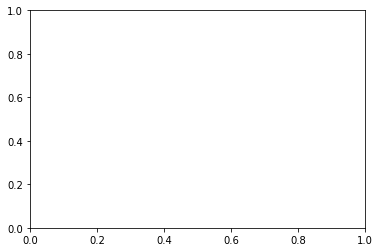

In [7]:
rst.plot_predict(0,len(cases))

## Test inclusion of exogenous variables

In [ ]:
labor = pd.read_csv(r'../../data/demographics/CA_State_labor.csv')
labor.head()

In [ ]:
df['month'] = df['date'].apply(lambda x: int(x.month))
df.head()

In [ ]:
exo_test = df[['date', 'month','California.JHU_ConfirmedCases.data']].merge(labor[['month','unemploymentRate']], on=['month'])
exo_test.head()

In [ ]:
arimax = arima_model.ARIMA(exo_test['California.JHU_ConfirmedCases.data'], 
                           order=(0,0,1), exog=exo_test['unemploymentRate'])
arimax_fit = arimax.fit(disp=0)
arimax_fit.summary()

In [ ]:
rst2 = arimax.fit(disp=-1)
rst2.fittedvalues

In [ ]:
rst2.plot_predict(0,len(exo_test), exog=exo_test['unemploymentRate'])